# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#cities

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kharkhorin
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | saratamata
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | samalut
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | freetown
Processing Record 12 of Set 1 | tolanaro
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | calvi
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | cozumel
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kharkhorin,47.1975,102.8238,14.58,75,80,4.39,MN,1721593471
1,west island,-12.1568,96.8225,26.99,89,75,5.66,CC,1721593473
2,blackmans bay,-43.0167,147.3167,10.29,87,100,1.38,AU,1721593475
3,adamstown,-25.0660,-130.1015,18.83,66,95,8.71,PN,1721593478
4,waitangi,-43.9535,-176.5597,9.90,99,100,4.02,NZ,1721593480


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kharkhorin,47.1975,102.8238,14.58,75,80,4.39,MN,1721593471
1,west island,-12.1568,96.8225,26.99,89,75,5.66,CC,1721593473
2,blackmans bay,-43.0167,147.3167,10.29,87,100,1.38,AU,1721593475
3,adamstown,-25.0660,-130.1015,18.83,66,95,8.71,PN,1721593478
4,waitangi,-43.9535,-176.5597,9.90,99,100,4.02,NZ,1721593480


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

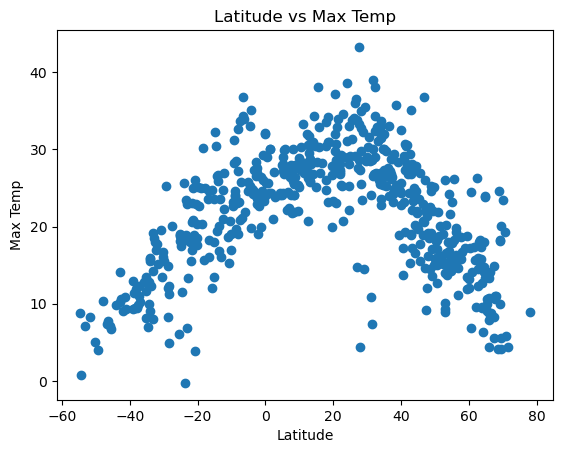

In [88]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

# Save the figure
plt.savefig("output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

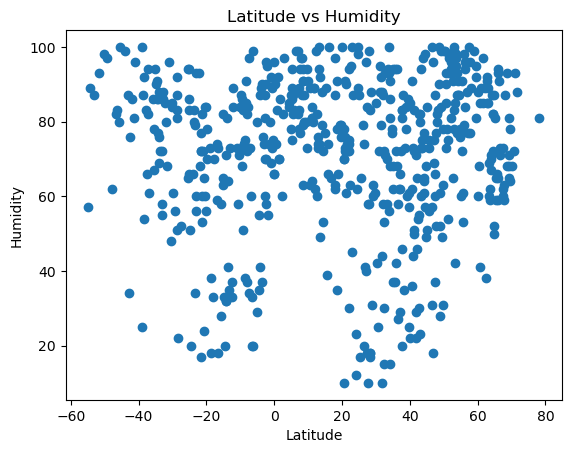

In [91]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

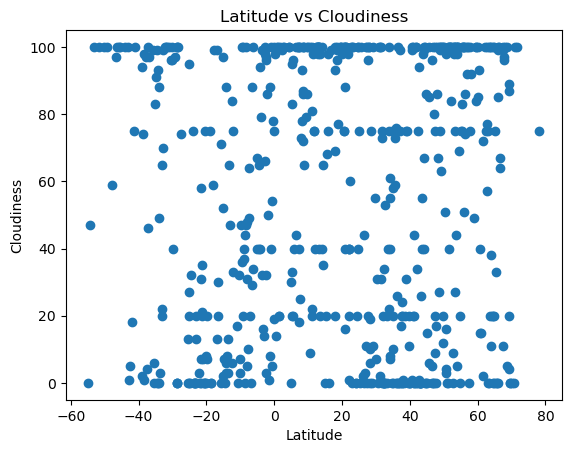

In [94]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

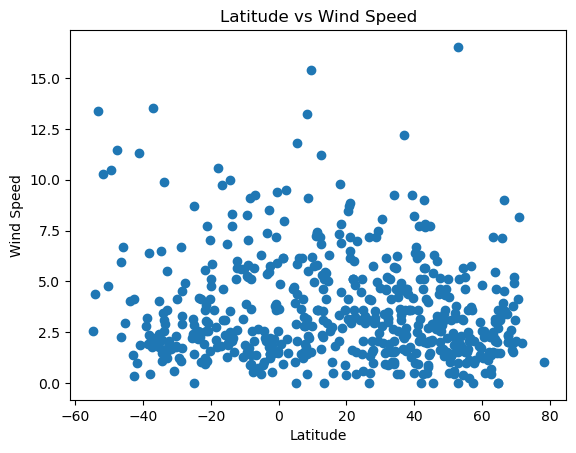

In [97]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coord):

    # linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kharkhorin,47.1975,102.8238,14.58,75,80,4.39,MN,1721593471
7,samalut,28.3121,30.7101,35.01,18,0,3.19,EG,1721593485
9,freetown,8.4840,-13.2299,24.05,94,100,3.15,SL,1721593489
12,praia da vitoria,38.7333,-27.0667,25.42,78,75,1.77,PT,1721593495
13,calvi,42.5000,8.8333,24.35,54,75,4.63,FR,1721593497


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,26.99,89,75,5.66,CC,1721593473
2,blackmans bay,-43.0167,147.3167,10.29,87,100,1.38,AU,1721593475
3,adamstown,-25.0660,-130.1015,18.83,66,95,8.71,PN,1721593478
4,waitangi,-43.9535,-176.5597,9.90,99,100,4.02,NZ,1721593480
5,bredasdorp,-34.5322,20.0403,6.94,86,0,1.06,ZA,1721593482


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4517705644339629


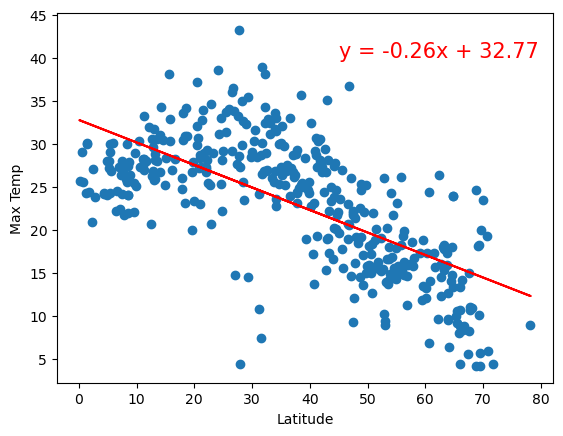

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (45, 40))

The r-value is: 0.6237381187861701


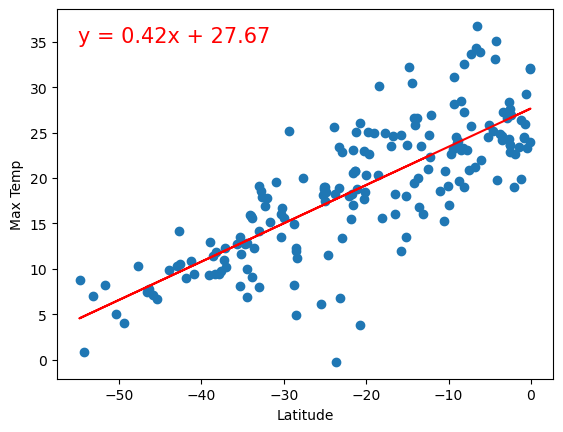

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** Based on the linear regression lines, we can see that city locations in the northern hemisphere with a latitude above zero will have increasingly lower maximum temperatures as the latitude increases. Locations in the southern hemisphere are flipped, so the closer a location is to the equator or zero latitude, the higher the maximum temperature will get.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0003622596460926149


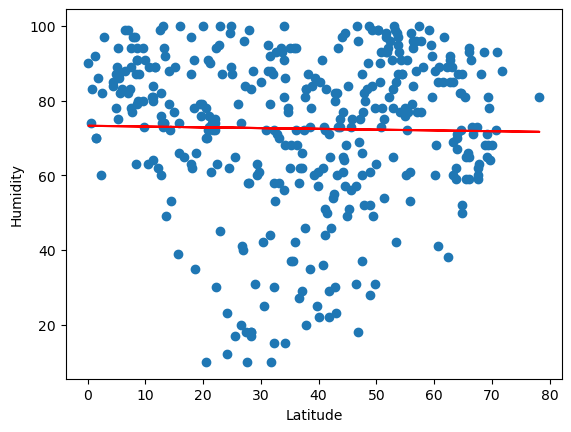

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45, 5))

The r-value is: 0.04225207973687146


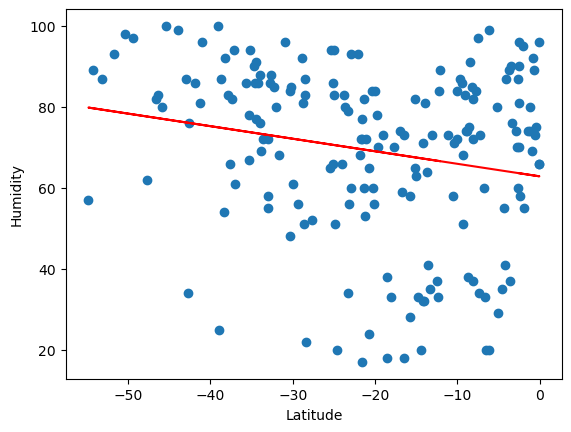

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 10))

**Discussion about the linear relationship:** Based on the linear regression line, humidity in the northern hemisphere is consistent, while in the southern hemisphere, humidity slightly decreases as the latitude location gets closer to zero. Although many humidity values are outside the regression line and the r-values are really close to zero so we can determine there is very little to no relationship between the variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006900165560686155


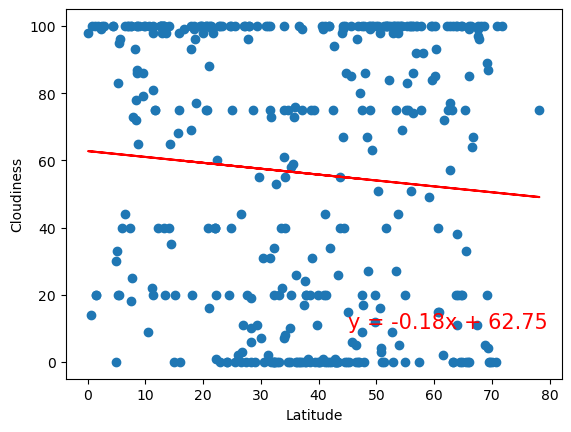

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45, 10))

The r-value is: 0.020818363148001156


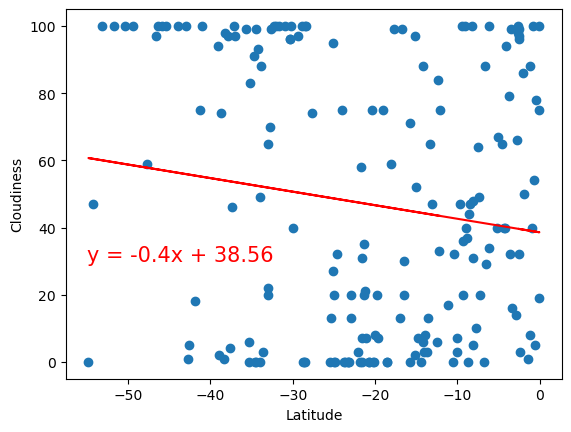

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 30))

**Discussion about the linear relationship:** For both hemispheres, the linear regression line doesn't seem to portray cloudiness accurately. Both regression lines show a decrease in cloudiness as you move up the latitude coordinates; it slightly decreases. However, there are so many variables outside the regression line, and the r-values are close to zero so we can determine there is very little to no relationship between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.056673327821590035


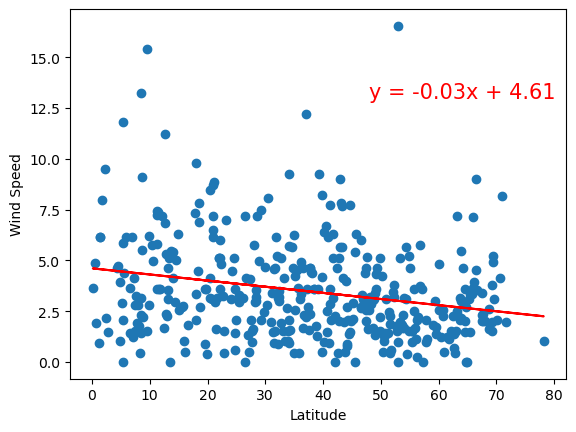

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (48, 13))

The r-value is: 0.011958811013616


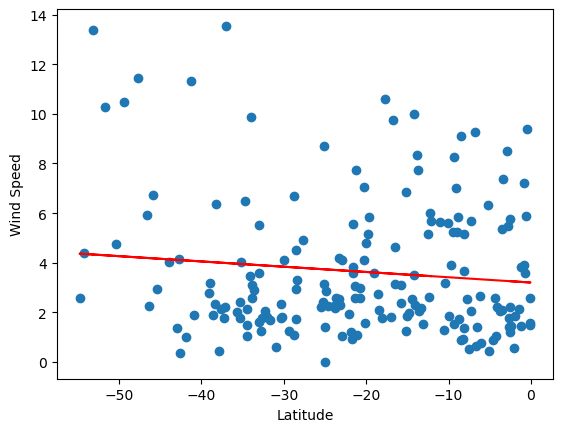

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55, 15))

**Discussion about the linear relationship:** Wind speed slightly decreases in the northern hemisphere as cities increase in latitude. Still, there are many outliers that latitude location may not be a great determinate of wind speed. In the southern hemisphere, the regression line is pretty straight, with a minor decrease as cities get closer to a latitude of zero. Again, many wind speed values lie outside the regression line and the r-values are really close to zero so we can determine there is very little to no relationship between the variables.